# Interpolation visualizer

### Parameters

In [1]:
N = 16      # Number of pixels by block
FRAC = 16   # Number of fractional pixels for interpolation
MODE = 0    # Select MC(0) or FME(1):
SEARCH = 2  # [Only for MC] Select Horizontal search(0), Vertical search(1) or Full search(2)
TAPS = 8    # Number of taps in the filter
I = 8       # Input size of the line 
S = 1       # Stride=1 means that the filter will deslocate 1 by 1 pixel at the time

#### Calculated parameters

In [2]:
import math

In [11]:
# Calculating padding
PADDING = math.ceil((TAPS - 1) / 2)

# Calculating one line size (considering a squared-block)
LINE = math.sqrt(N)

# Ensure that it results in an integer:
int = (I - TAPS + 2*PADDING) / (S + 1)

print("Padding = ", PADDING)
print("Integer = ", int)

Padding =  4
Integer =  4.0


### Basic setup

In [4]:
import numpy as np
from matplotlib import pyplot as plt

TypeError: 'float' object cannot be interpreted as an integer

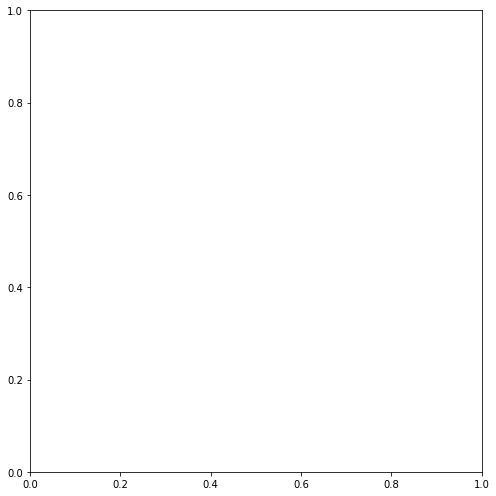

In [12]:
plt.rcParams["figure.figsize"]=[7,7] # Size of the ploted image 
plt.rcParams["figure.autolayout"]=True

fig, ax = plt.subplots()
min_val = 0
max_val = LINE + 2*PADDING + FRAC*(LINE/2 - 1)   # Size of the matrix max_val x max_val
matrix = np.zeros((max_val, max_val), dtype=np.uint8)
# MATRIX[HORIZONTAL, VERTICAL]

# The original pixels from the input block
matrix[PADDING,PADDING] = 1
matrix[max_val-PADDING-1,max_val-PADDING-1] = 1
matrix[max_val-PADDING-1, PADDING] = 1
matrix[PADDING, max_val-PADDING-1] = 1

# Horizontaly interpolated pixels (1st pass)
matrix[PADDING, PADDING+1:max_val-PADDING-1] = 2
matrix[max_val-PADDING-1, PADDING+1:max_val-PADDING-1] = 2

# Verticaly interpolated pixels (2nd pass)
matrix[PADDING+1:max_val-PADDING-1,PADDING] = 3
matrix[PADDING+1:max_val-PADDING-1,max_val-PADDING-1] = 3

# Vertical and dependent interpolated pixels (2nd pass)
matrix[PADDING+1:max_val-PADDING-1,PADDING+1:max_val-PADDING-1] = 4

ax.matshow(matrix, cmap='OrRd_r')

# Write the 
for i in range(max_val):
    for j in range(max_val):
        c = matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

print('Matrix size: ', max_val, 'x', max_val)
plt.show()

 0 = Padding
 
 1 = Original pixels from block 

 2 = Horizontaly generated pixels in 1st pass

 3 = Verticaly generated pixels in 2nd pass
 
 4 = Dependent verticaly generated pixels in 2nd pass

In [6]:
# supported values are 'Accent', 'Accent_r', 'Blues', 
# 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
# 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
# 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 
# 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
# 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 
# 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 
# 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
# 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
# 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
# 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
# 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
# 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
# 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
# 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
# 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
# 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 
# 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
# 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
# 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
# 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
# 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
# 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 
# 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
# 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
# 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
# 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
# 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
# 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
# 'viridis_r', 'winter', 'winter_r'

## Motion Compensation (MC)

X and Y are the vectors generated for affine transformation.

Their format are fixed point ?

#### First case: X and Y components are integers

In [7]:
# Nothing to do, just foward the input

#### Second case: X or Y component is fractional

In [8]:
# Second test

#### Third case: X and Y components are fractional

## Fractional Motion Estimation (FME)